In [1]:
# machine learning to train a model that can accurately classify audio tracks into genres. 

In [3]:
#Impoting essential libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Feature scaling 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder ## Label Encoding categorical variables, Normalization and Standardization
from sklearn.model_selection import train_test_split #to split the data into training set and test set
from sklearn.linear_model import LinearRegression # For Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score # For Linear Regression Metrics
# Import all metrics for classification task
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree 
# Import all metrics for classification task
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
# Ensemble Learning Classifiers
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
# review slide 13 chp 5 regaridng thsi task mainly for featrue scaling and encoding 

In [4]:
#Load the data : Data Collection 
df = pd.read_csv(r"C:\Users\zuhai\Desktop\Projects\Machine Learning Project\songs_data.csv")
df = pd.DataFrame(df)
df.head(n=5)

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6ho0GyrWZN3mhi9zVRW7xi,Losing It,FISHER,79,edm,0.760,0.964,2,-5.844,1,0.0576,0.001820,0.70000,0.0974,0.641,125.000,248036
1,4bYJKHG6KLdGzHQRJMaFc8,Rock And Roll All Nite,KISS,3,rock,0.581,0.831,1,-8.045,1,0.1070,0.045800,0.00000,0.0782,0.885,144.684,168160
2,1VGlMYqPO1LHyclvfIMvWI,Snälla bli min (Hjalm Remix),Robin Lukovic,0,edm,0.661,0.760,8,-4.769,1,0.0268,0.000406,0.04070,0.6110,0.439,99.993,271238
3,6BbINUfGabVyiNFJpQXn3x,Wicked,Future,62,rap,0.718,0.679,11,-5.899,0,0.0706,0.001910,0.01040,0.3850,0.205,157.970,173347
4,1Ly0ssAgeM7YqdHptao8Oe,Paranoid,Black Sabbath,15,rock,0.426,0.619,4,-11.501,0,0.0722,0.000084,0.00239,0.1700,0.382,162.721,168440


In [5]:
#Refresh and Review Dataset 
df.shape
df.info()
#Cross-Validation with Logistic Regression after data split and preprocessed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28396 entries, 0 to 28395
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          28396 non-null  object 
 1   track_name        28392 non-null  object 
 2   track_artist      28392 non-null  object 
 3   track_popularity  28396 non-null  int64  
 4   genre             28396 non-null  object 
 5   danceability      28396 non-null  float64
 6   energy            28396 non-null  float64
 7   key               28396 non-null  int64  
 8   loudness          28396 non-null  float64
 9   mode              28396 non-null  int64  
 10  speechiness       28396 non-null  float64
 11  acousticness      28396 non-null  float64
 12  instrumentalness  28396 non-null  float64
 13  liveness          28396 non-null  float64
 14  valence           28396 non-null  float64
 15  tempo             28396 non-null  float64
 16  duration_ms       28396 non-null  int64 

In [6]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000
mean,39.336104,0.653386,0.698387,5.368256,-6.817541,0.565397,0.107990,0.177263,0.091143,0.190986,0.510434,120.955390,226575.367094
std,23.706486,0.145799,0.183484,3.613898,3.036443,0.495714,0.102623,0.222908,0.232566,0.156015,0.234309,26.957635,61076.581384
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,21.000000,0.561000,0.579000,2.000000,-8.309000,0.000000,0.041000,0.014400,0.000000,0.092600,0.329000,99.972000,187766.500000
50%,42.000000,0.670000,0.722000,6.000000,-6.262000,1.000000,0.062700,0.079700,0.000021,0.127000,0.512000,121.993000,216921.000000
75%,58.000000,0.760000,0.843000,9.000000,-4.708750,1.000000,0.133000,0.260000,0.006573,0.249000,0.695000,133.999500,254965.500000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


## Discrete and Continuous Variables
### Discrete Variables
Discrete variables take on specific, distinct values and are often categorical or count-based.

- `track_id`
- `genre`
- `energy`
- `danceability`
- `mode`
- `acousticness`
- `track_popularity`
- `key`

### Continuous Variables
Continuous variables can take on any value within a range and are typically measured on a continuous scale.

- `track_name`
- `track_artist`
- `loudness`
- `speechiness`
- `instrumentalness`
- `liveness`
- `valence`
- `tempo`
- `duration_ms`


In [7]:
#Data Cleaning and Preprocessing 
df.isna().sum()

track_id            0
track_name          4
track_artist        4
track_popularity    0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [8]:
df[df['track_name'].isna()]
df[df['track_artist'].isna()]

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
16265,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
16995,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
25483,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,rap,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
27825,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,latin,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773


<span style="color:green; font-weight:bold; font-style:italic">
The dataset contains 28,395 rows, and we have encountered 4 missing (NaN) values. This represents an insignificant proportion of the data, so it is reasonable to delete these rows.
Since these missing values occur in object (categorical) columns, they cannot be meaningfully imputed, nor can they likely be traced to proper records. Therefore, these rows are negligible for further analysis and can safely be removed. 
</span>

In [9]:
df.duplicated().sum()

np.int64(40)

<span style="color:green; font-weight:bold; font-style:italic">
Given the analysis we proceed with dropping the duplicated rows as well as the rows with no NaN. Related to the NaN we can diagnose that the data size is significanty enormous and the proportion of NaN values is approaximately : 0.014. This suggest that its preferable to drop the data due to it in sufficient indulge in distirbuting the dataset. This resolves the data quailty to a certain degree. 
    
</span>

In [10]:
df = df.drop_duplicates()
df = df.dropna()
df.shape

(28352, 17)

In [11]:
print(df['genre'].unique())

['edm' 'rock' 'rap' 'latin' 'r&b' 'pop']


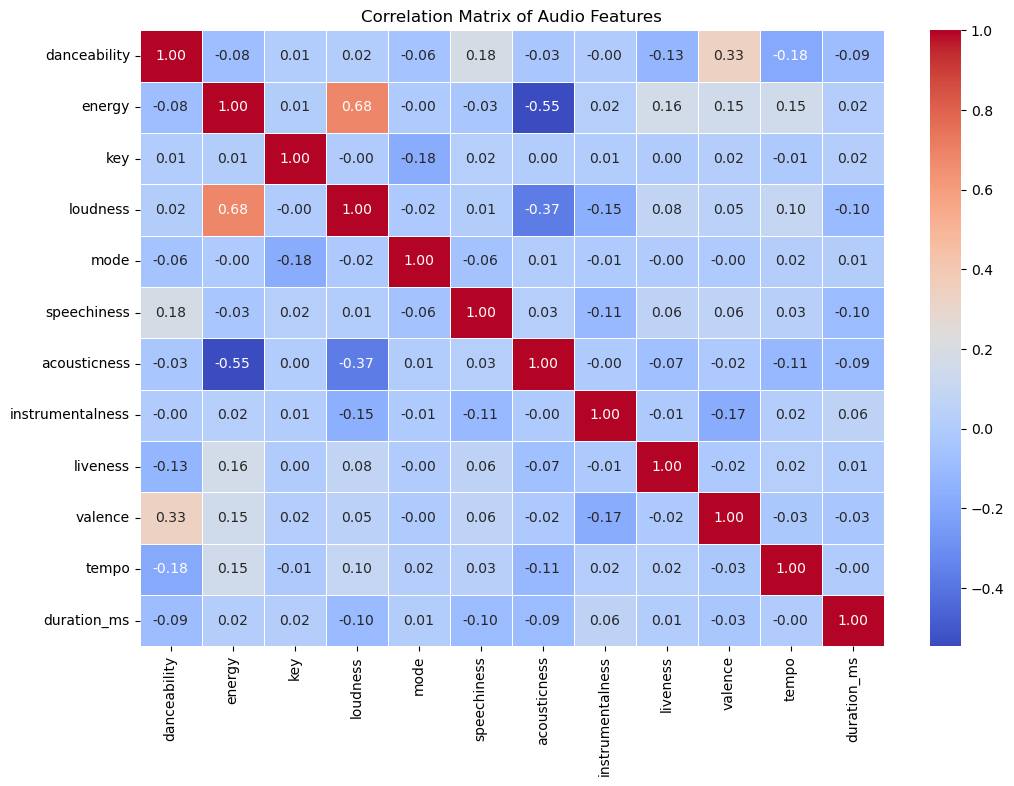

In [12]:
#Now we analyze the dataset : Visulization and Exploration 
numeric_cols = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
# correlation matrix and heatmap
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Audio Features")
plt.show()

<table>
<tr><th style="color:green"><b><i>Column Name</i></b></th><th style="color:green"><b><i>Description</i></b></th></tr>
<tr><td><b><i>track_id</i></b></td><td>Unique identifier for each track in the dataset</td></tr>
<tr><td><b><i>track_name</i></b></td><td>Name/title of the track</td></tr>
<tr><td><b><i>track_artist</i></b></td><td>Name of the artist performing the track</td></tr>
<tr><td><b><i>track_popularity</i></b></td><td>Popularity of the track (scale 0-100)</td></tr>
<tr><td><b><i>genre</i></b></td><td>Primary genre of the track</td></tr>
<tr><td><b><i>danceability</i></b></td><td>Measures how suitable a track is for dancing (higher = more danceable)</td></tr>
<tr><td><b><i>energy</i></b></td><td>Represents intensity and activity of the track; higher energy tracks feel more energetic and lively</td></tr>
<tr><td><b><i>key</i></b></td><td>Musical key of the track, represented as integers (0=C, 1=C#/Db, … 11=B)</td></tr>
<tr><td><b><i>loudness</i></b></td><td>Overall loudness in decibels (dB) of the track</td></tr>
<tr><td><b><i>mode</i></b></td><td>Modality of the track (1=major, 0=minor)</td></tr>
<tr><td><b><i>speechiness</i></b></td><td>Detects presence of spoken words (higher = more speech-like content)</td></tr>
<tr><td><b><i>acousticness</i></b></td><td>Likelihood that the track is acoustic (higher = more acoustic)</td></tr>
<tr><td><b><i>instrumentalness</i></b></td><td>Predicts whether a track contains no vocals (higher = more instrumental)</td></tr>
<tr><td><b><i>liveness</i></b></td><td>Detects presence of audience (higher = more likely live performance)</td></tr>
<tr><td><b><i>valence</i></b></td><td>Musical positiveness conveyed by a track (higher = more positive, happy, cheerful)</td></tr>
<tr><td><b><i>tempo</i></b></td><td>Speed of the track in beats per minute (BPM)</td></tr>
<tr><td><b><i>duration_ms</i></b></td><td>Duration of the track in milliseconds</td></tr>
</table>


In [13]:
df['track_artist'].value_counts()

track_artist
Queen             130
Martin Garrix      87
Don Omar           84
David Guetta       81
Hardwell           68
                 ... 
The Veer Union      1
Ice Mc              1
Sonic Snares        1
Keala Settle        1
BIMONTE             1
Name: count, Length: 10692, dtype: int64

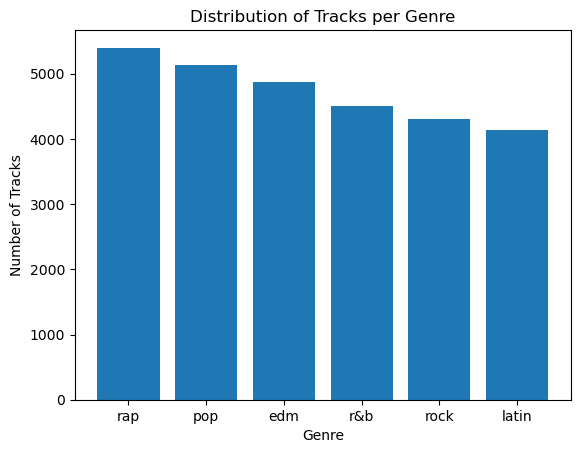

In [14]:
# bar chart to understand the distirbution of the genre 
genre_counts = df['genre'].value_counts()

# Plot
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Tracks per Genre')
plt.show()

In [15]:
df.drop(columns='track_id', inplace=True)

## Why `track_id` Is Irrelevant for Music Genre Classification

The `track_id` feature is not useful for music genre classification for the following reasons:

- **Randomly generated**: The values are assigned arbitrarily and do not follow any meaningful pattern.
- **No semantic meaning**: The identifier does not encode any information about the music itself.
- **Unique per track**: Each track has a distinct ID, preventing the model from learning generalizable patterns.
- **No relationship to musical characteristics**: The ID does not correlate with audio features such as tempo, rhythm, or timbre.

Including `track_id` as a feature introduces **noise** into the machine learning model, which can hinder learning and negatively impact overall model performance. A similar characteristics can be referenced and related to the **track_name** column data. 

In [16]:
df.drop(columns='track_name', inplace=True)
df.columns

Index(['track_artist', 'track_popularity', 'genre', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

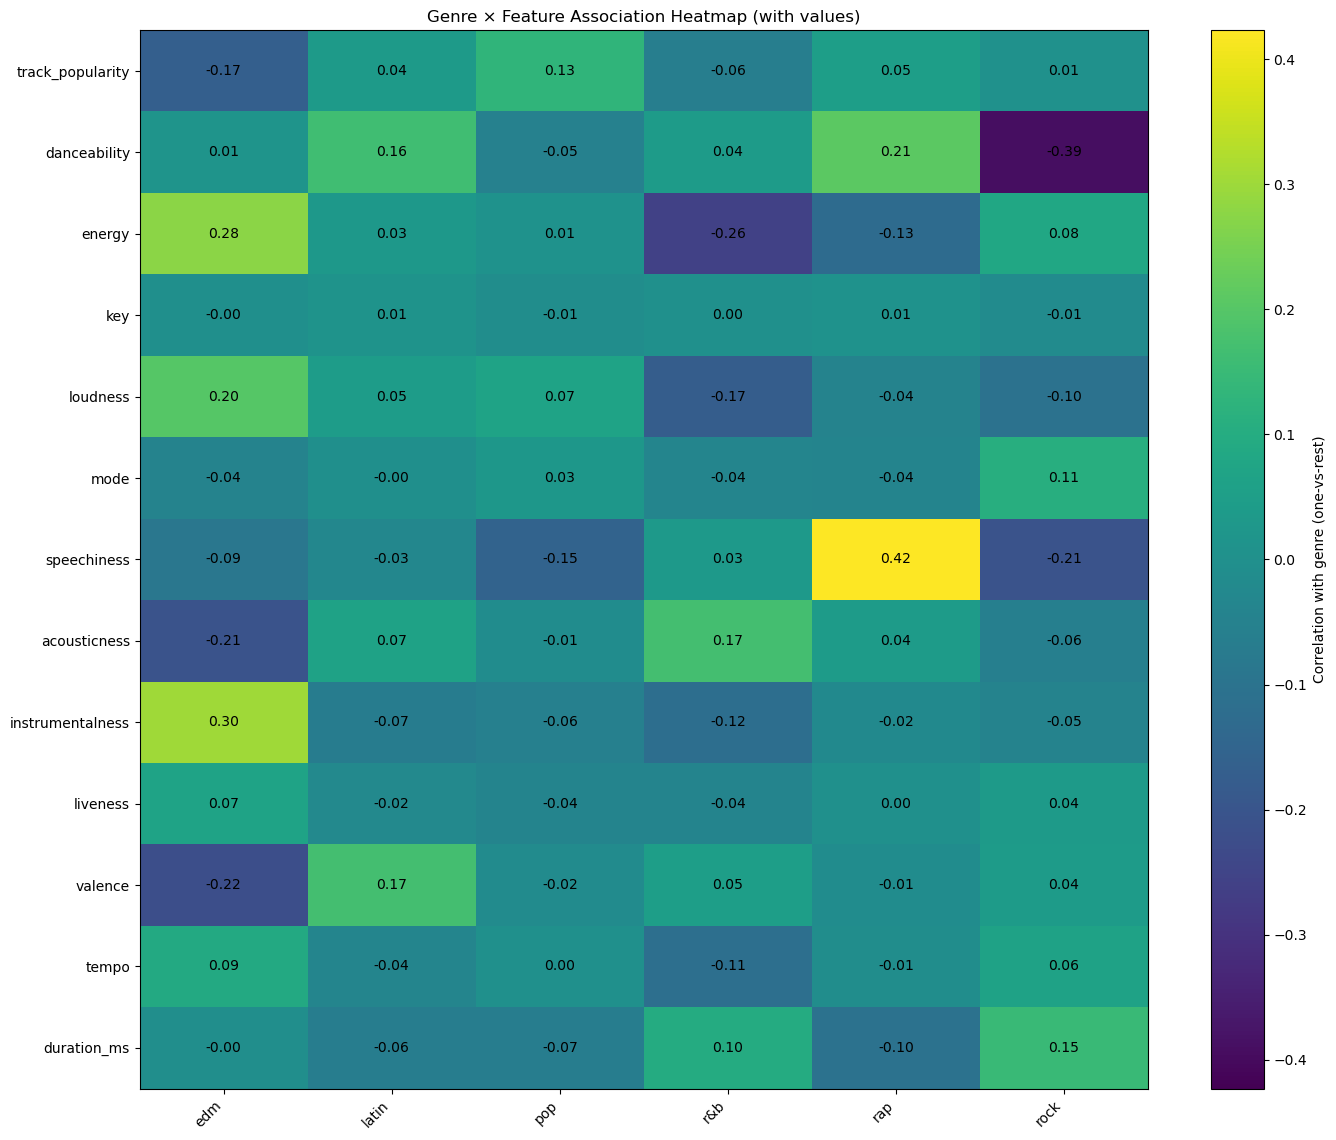

In [18]:
features = [
    "track_popularity","danceability","energy","key","loudness","mode",
    "speechiness","acousticness","instrumentalness","liveness",
    "valence","tempo","duration_ms"
]

genres = sorted(df["genre"].unique())

# Build correlation table (one-vs-rest)
corr_table = pd.DataFrame(index=features, columns=genres, dtype=float)
for g in genres:
    binary = (df["genre"] == g).astype(int)
    for feat in features:
        corr_table.loc[feat, g] = df[feat].corr(binary)

# Pearson correlation here is equivalent to point-biserial correlation
# because `binary` is a 0/1 variablecorr_table = corr_table.loc[corr_table.abs().mean(axis=1).sort_values(ascending=False).index]

# Plot heatmap with numbers
vals = corr_table.values
vmax = np.nanmax(np.abs(vals))  # symmetric color scale around 0

plt.figure(figsize=(1.2*len(genres) + 7, 0.5*len(features) + 5))
im = plt.imshow(vals, aspect="auto", vmin=-vmax, vmax=vmax)
plt.colorbar(im, label="Correlation with genre (one-vs-rest)")

plt.xticks(range(len(genres)), genres, rotation=45, ha="right")
plt.yticks(range(len(corr_table.index)), corr_table.index)
plt.title("Genre × Feature Association Heatmap (with values)")

# Annotate each cell with the numeric value
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        plt.text(j, i, f"{vals[i, j]:.2f}", ha="center", va="center")

plt.tight_layout()
plt.show()

### Musical Key (Genre vs Qualitative data relationshi)
Although several features showed weak linear correlation with genre labels, they were retained due to the limitations of correlation analysis in capturing nonlinear and interaction-based effects which could be relevant to machine learning classifiers.

In [19]:
# count unique genres per artist
df2 = df[["track_artist", "genre"]].copy()

genres_per_artist = ( df2.groupby("track_artist")["genre"].nunique())    #to counting the unique genres per artist
# distribution of the genre counts
distribution = (genres_per_artist.value_counts().sort_index())
# print result
for k, v in distribution.items():
    label = "genre" if k == 1 else "genres"
    print(f"{k} {label} : {v}")

1 genre : 9276
2 genres : 1090
3 genres : 234
4 genres : 80
5 genres : 12


In [20]:
genres_per_artist.max()

5

In [25]:
genres_per_artist.head(n=5)

track_artist
!!!                                             1
!deladap                                        2
"Dear Evan Hansen" August 2018 Broadway Cast    1
#TocoParaVos                                    1
$ANFI                                           1
Name: genre, dtype: int64

That proves no artist has 6 genres.

In [52]:
df_mode = df[["mode", "genre"]].copy()

mode_summary = (
    df_mode.groupby("mode").agg(tracks=("genre", "size"),unique_genres=("genre", "nunique")).sort_index())

print(mode_summary)

      tracks  unique_genres
mode                       
0      12318              6
1      16034              6


In [45]:
mode_by_genre = (
    df[["genre","mode"]].groupby("genre")["mode"].mean().sort_values(ascending=False))

print(mode_by_genre)

genre
rock     0.692683
pop      0.591972
latin    0.561654
rap      0.522786
r&b      0.521536
edm      0.516711
Name: mode, dtype: float64


In [54]:
df_key = df[["key", "genre"]].copy()

key_summary = (
    df_key.groupby("key").agg(tracks=("genre", "size"),unique_genres=("genre", "nunique")).sort_index())

print(key_summary)

     tracks  unique_genres
key                       
0      3001              6
1      3436              6
2      2478              6
3       797              6
4      1925              6
5      2301              6
6      2261              6
7      2907              6
8      2066              6
9      2631              6
10     1972              6
11     2577              6


In [55]:
key_genre_counts = (df[["key", "genre"]].groupby(["key", "genre"]).sum())
print(key_genre_counts)

Empty DataFrame
Columns: []
Index: [(0, edm), (0, latin), (0, pop), (0, r&b), (0, rap), (0, rock), (1, edm), (1, latin), (1, pop), (1, r&b), (1, rap), (1, rock), (2, edm), (2, latin), (2, pop), (2, r&b), (2, rap), (2, rock), (3, edm), (3, latin), (3, pop), (3, r&b), (3, rap), (3, rock), (4, edm), (4, latin), (4, pop), (4, r&b), (4, rap), (4, rock), (5, edm), (5, latin), (5, pop), (5, r&b), (5, rap), (5, rock), (6, edm), (6, latin), (6, pop), (6, r&b), (6, rap), (6, rock), (7, edm), (7, latin), (7, pop), (7, r&b), (7, rap), (7, rock), (8, edm), (8, latin), (8, pop), (8, r&b), (8, rap), (8, rock), (9, edm), (9, latin), (9, pop), (9, r&b), (9, rap), (9, rock), (10, edm), (10, latin), (10, pop), (10, r&b), (10, rap), (10, rock), (11, edm), (11, latin), (11, pop), (11, r&b), (11, rap), (11, rock)]

[72 rows x 0 columns]


In [57]:
bins = [0, 20, 40, 60, 80, 100]
labels = ["very_low", "low", "medium", "high", "very_high"]

df["popularity_bin"] = pd.cut(
    df["track_popularity"],
    bins=bins,
    labels=labels,
    include_lowest=True
)
genre_popularity_counts = (
    df[["genre", "popularity_bin"]].dropna()
      .groupby(["genre", "popularity_bin"])
      .size()
      .unstack(fill_value=0)
)
#The ratio values across bins sum to 1 
genre_popularity_ratio = (
    genre_popularity_counts
    .div(genre_popularity_counts.sum(axis=1), axis=0)
)


print(genre_popularity_counts)

popularity_bin  very_low       low    medium      high  very_high
genre                                                            
edm             0.322124  0.333402  0.279065  0.064384   0.001025
latin           0.220261  0.196809  0.353482  0.214458   0.014990
pop             0.192128  0.188815  0.284489  0.289751   0.044817
r&b             0.293295  0.249334  0.280639  0.169183   0.007549
rap             0.202112  0.195628  0.386254  0.202482   0.013524
rock            0.259233  0.194193  0.308014  0.234146   0.004413
popularity_bin  very_low   low  medium  high  very_high
genre                                                  
edm                 1571  1626    1361   314          5
latin                911   814    1462   887         62
pop                  986   969    1460  1487        230
r&b                 1321  1123    1264   762         34
rap                 1091  1056    2085  1093         73
rock                1116   836    1326  1008         19


C:\Users\zuhai\AppData\Local\Temp\ipykernel_5896\2826037185.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["genre", "popularity_bin"])


In [59]:
bins = [0, 20, 40, 60, 80, 100]
labels = ["very_low", "low", "medium", "high", "very_high"]
df["popularity_bin"] = pd.cut(df["track_popularity"], bins=bins, labels=labels, include_lowest=True)
print(df.head(n=5))

    track_artist  track_popularity genre  danceability  energy  key  loudness  \
0         FISHER                79   edm         0.760   0.964    2  0.510270   
1           KISS                 3  rock         0.581   0.831    1  0.396050   
2  Robin Lukovic                 0   edm         0.661   0.760    8  0.577497   
3         Future                62   rap         0.718   0.679   11  0.507049   
4  Black Sabbath                15  rock         0.426   0.619    4  0.266042   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0576      0.001820           0.70000    0.0974    0.641   
1     1       0.1070      0.045800           0.00000    0.0782    0.885   
2     1       0.0268      0.000406           0.04070    0.6110    0.439   
3     0       0.0706      0.001910           0.01040    0.3850    0.205   
4     0       0.0722      0.000084           0.00239    0.1700    0.382   

     tempo  duration_ms popularity_bin  
0  125.000       2480

The table is a correctly computed ratio showing the fraction of tracks per popularity bin within each genre.

Binning track popularity reveals clear genre-dependent concentration patterns, demonstrating that popularity is not uniformly distributed across genres. Representing popularity as an ordinal categorical feature therefore improves interpretability and provides a more stable and informative signal for both linear models and decision trees.

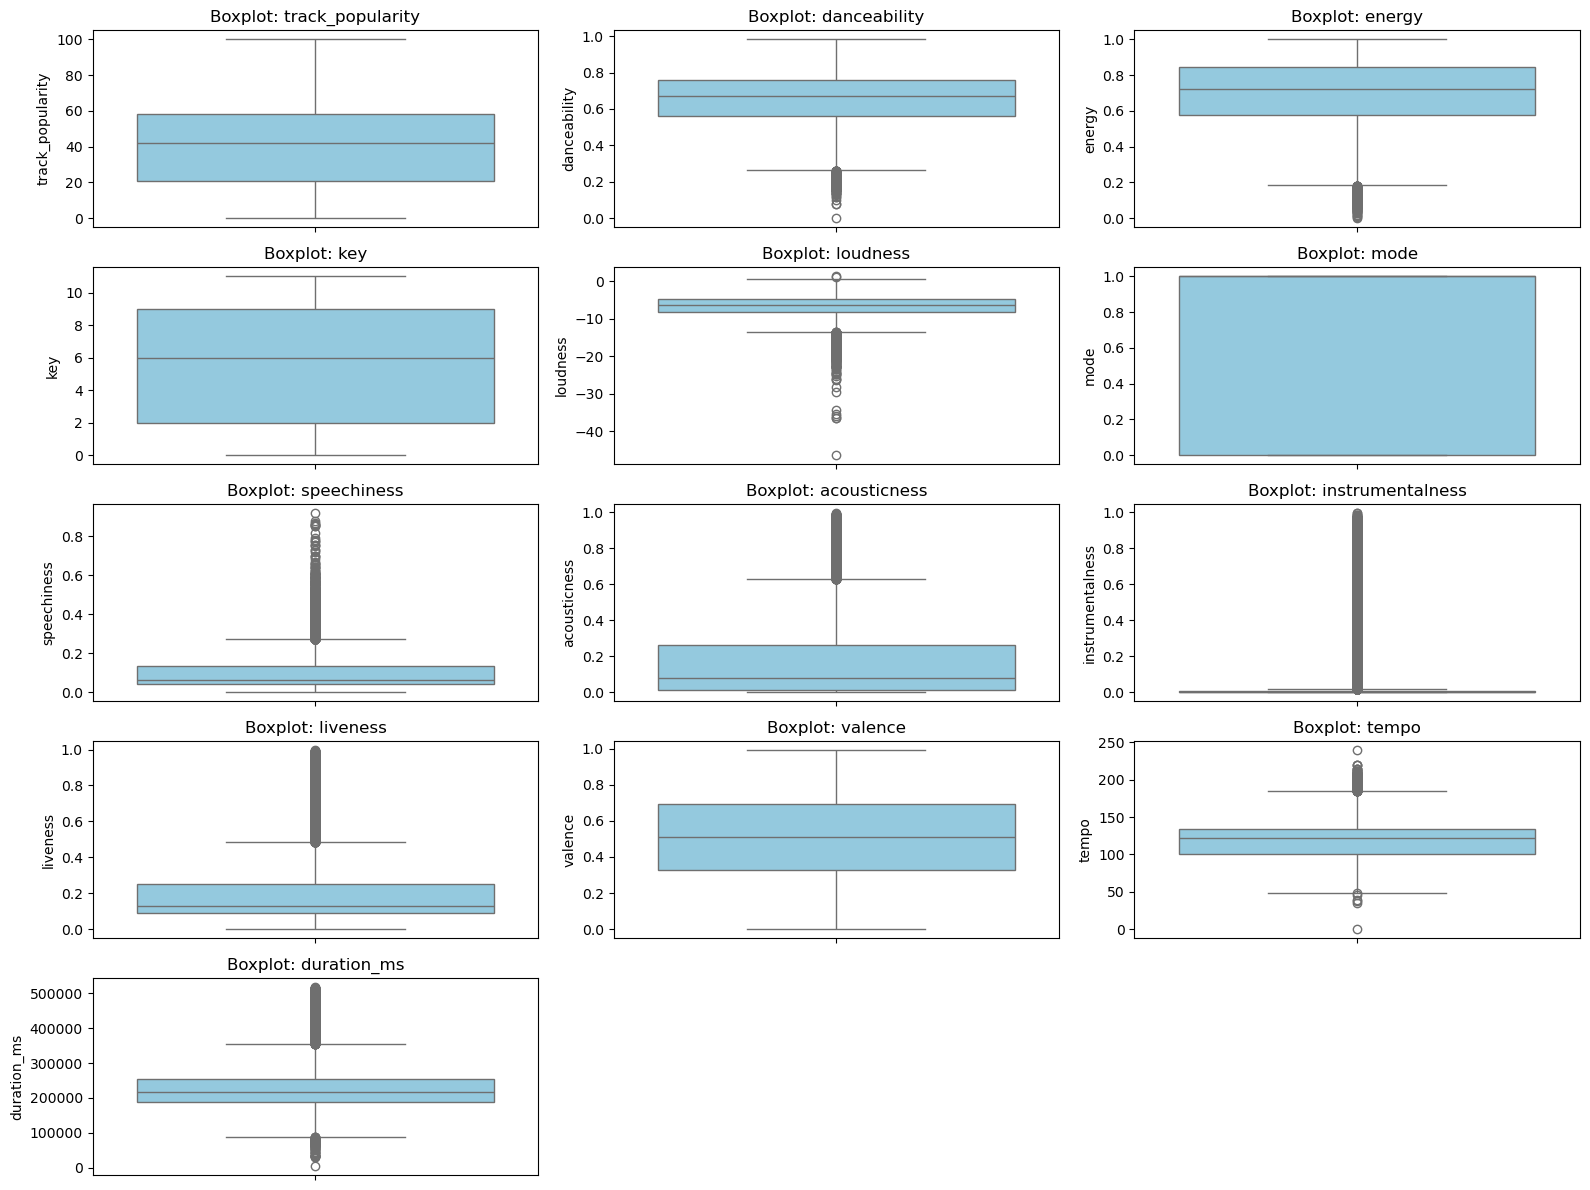

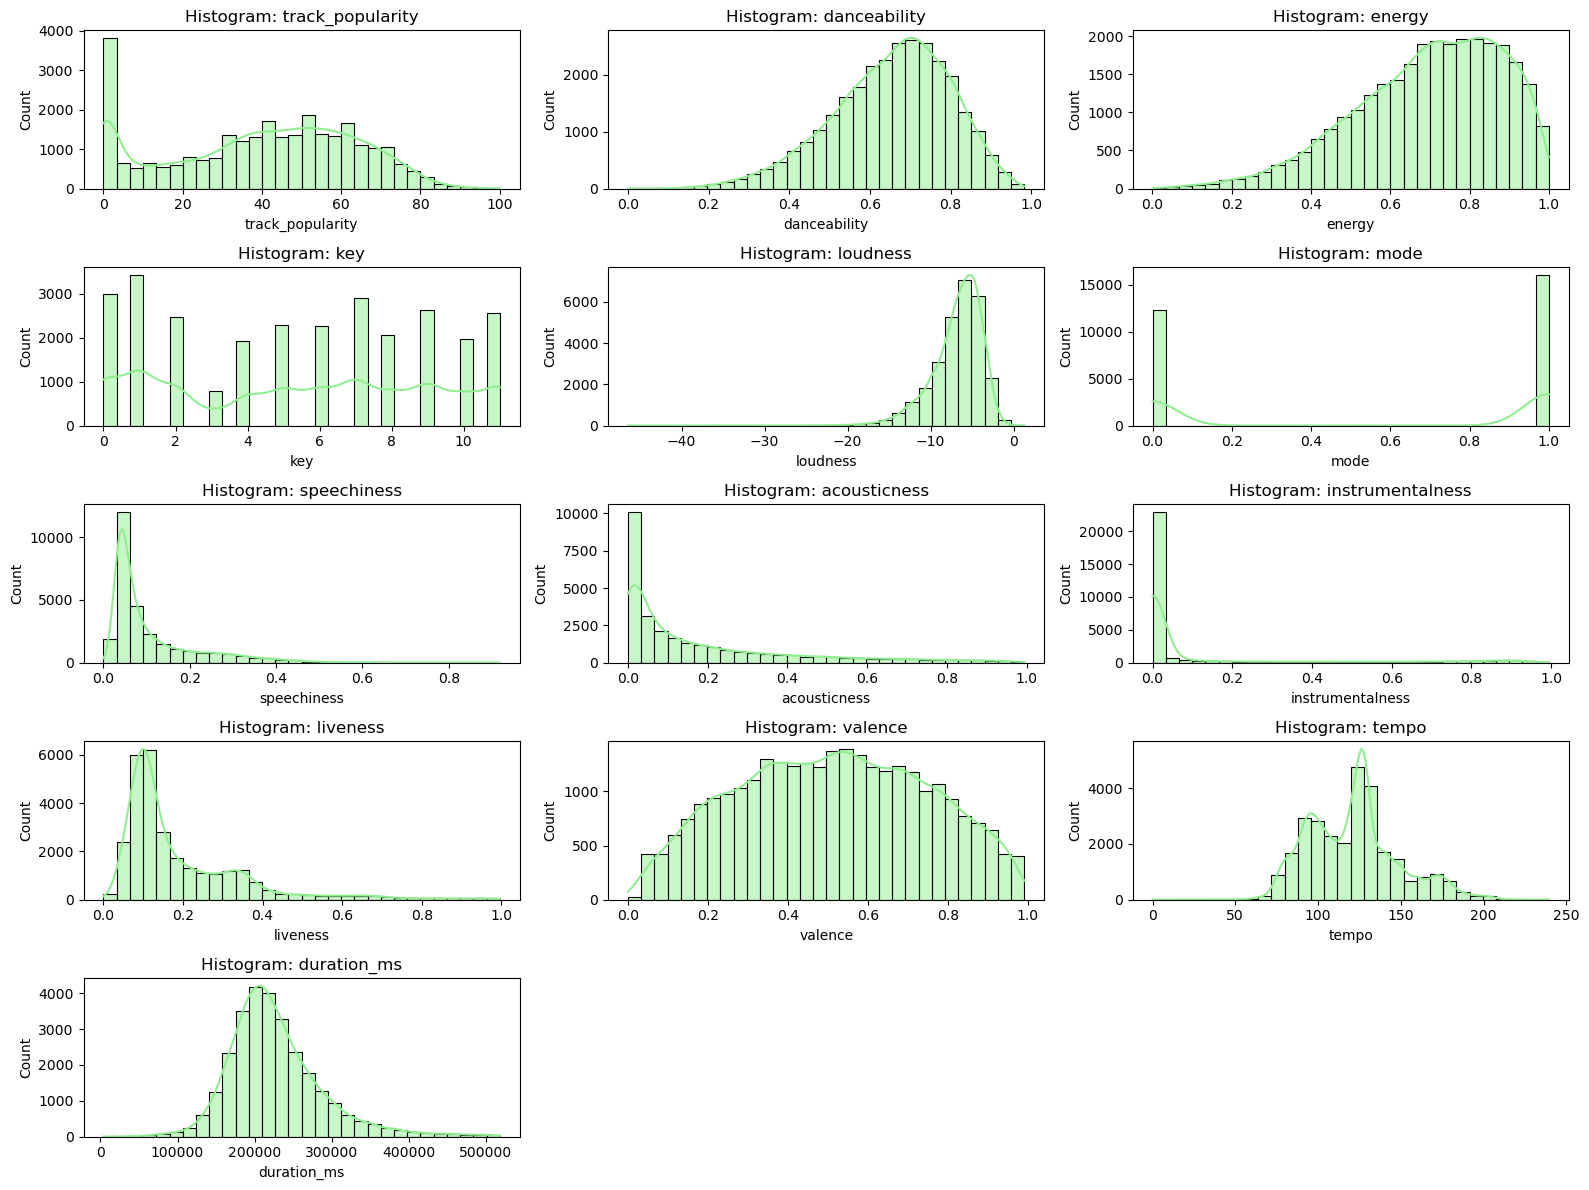

In [55]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Boxplots
plt.figure(figsize=(16, 12))
plot_index = 1  # grid index 
for col in numeric_cols:
    plt.subplot((len(numeric_cols)+2)//3, 3, plot_index) 
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plot_index += 1  # increment counter
plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(16, 12))
plot_index = 1 
for col in numeric_cols:
    plt.subplot((len(numeric_cols)+2)//3, 3, plot_index)
    sns.histplot(df[col], bins=30, kde=True, color='lightgreen')
    plt.title(f'Histogram: {col}')
    plot_index += 1
plt.tight_layout()
plt.show()

## Valence
The continuous representation of valence retains fine-grained emotional information, allowing the model to capture gradual variations in musical mood. This makes valence a highly informative feature, particularly well-suited for Multiple Linear Regression.

## Liveness
After a certain degree of evaulation, consideration and hypothesis orineted analysis. I conclude that the varibale liveness should be transformed using the sigmoid funtion. A sigmoid transformation of the liveness feature introduces a soft decision boundary around 0.5, while preserving continuity. 

Since liveness semantically represents the presence of an audience, it resonates more strongly with a decision-boundary interpretation rather than a purely linear scale, which motivates its transformation using a sigmoid function.


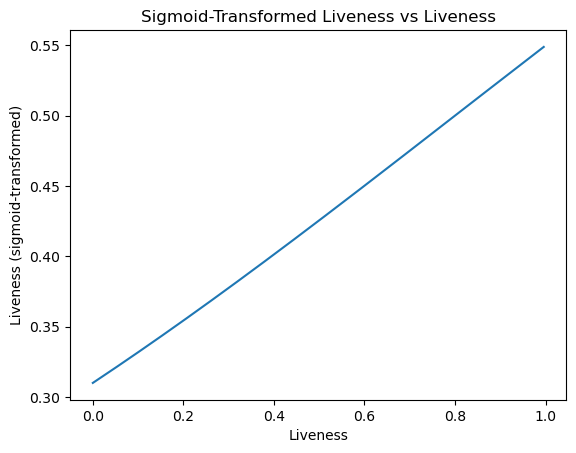

In [67]:
df["liveness_sigmoid"] = 1 / (1 + np.exp(-(df["liveness"] - 0.8)))
tmp = df[["liveness", "liveness_sigmoid"]].dropna().sort_values("liveness")

plt.figure()
plt.plot(tmp["liveness"].to_numpy(), tmp["liveness_sigmoid"].to_numpy())
plt.xlabel("Liveness")
plt.ylabel("Liveness (sigmoid-transformed)")
plt.title("Sigmoid-Transformed Liveness vs Liveness")
plt.show()

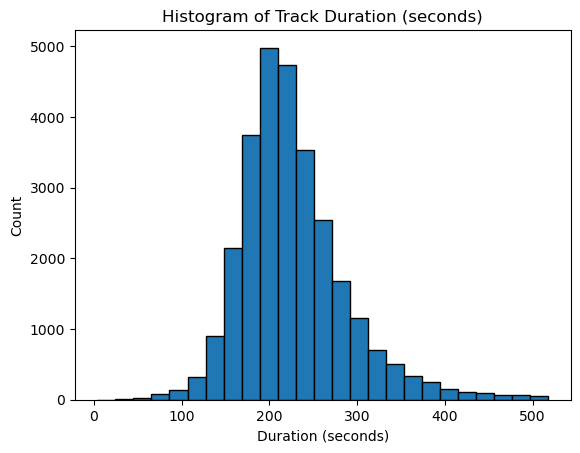

In [72]:
df["duration_sec"] = df["duration_ms"] / 1000

# histogram
plt.figure()
plt.hist(df["duration_sec"],bins=25, edgecolor="black")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.title("Histogram of Track Duration (seconds)")
plt.show()

## Loudness
I#m prioritizing statistical coherence and model behavior over raw physical interpretation. 
Decibels(dB) unit representation of loudness is in terms of physics correct, exhibiting a wide negative range that naturally introduces extreme values when assessed.
These deviations are not errors but inherent to the logarithmic nature of the dB scale. However, within the context of this dataset, loudness is not being analyzed as a physical acoustic quantity but as a comparative feature alongside normalized attributes. 

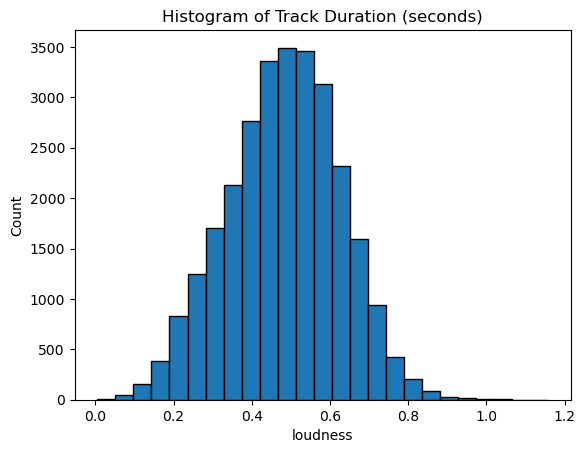

In [32]:
df['loudness'] = 10 ** (df['loudness'] / 20)
plt.figure()
plt.hist(df["loudness"],bins=25, edgecolor="black")
plt.xlabel("loudness")
plt.ylabel("Count")
plt.title("Histogram of Track Duration (seconds)")
plt.show()

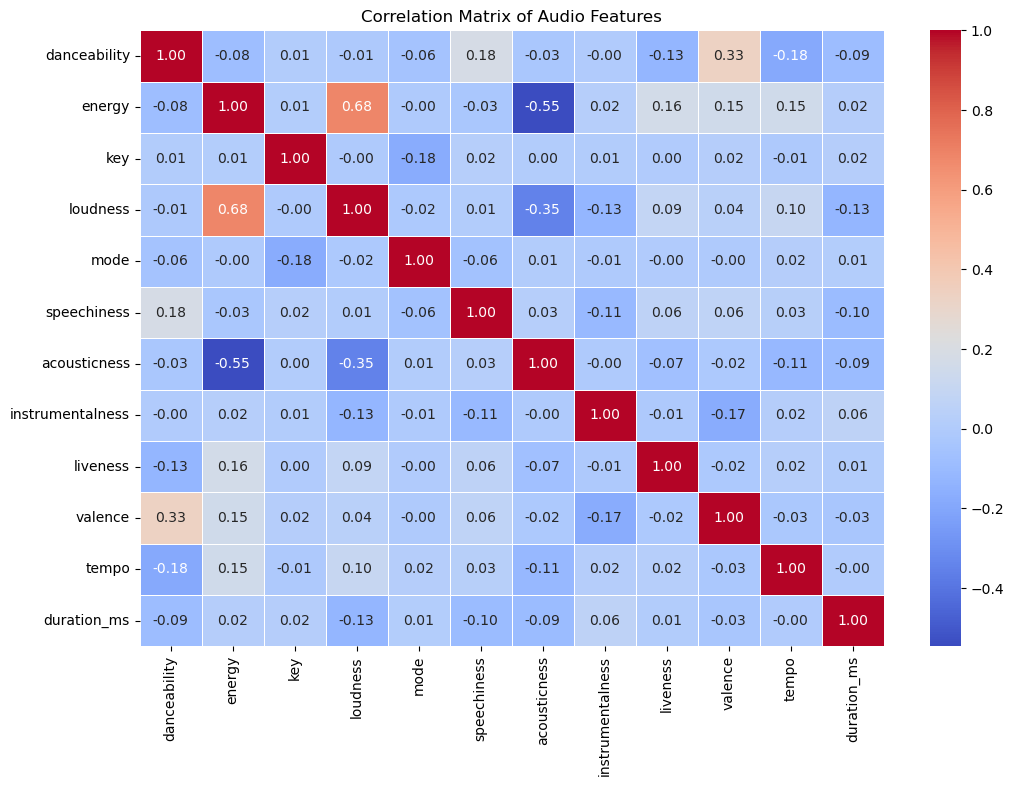

In [41]:
#Now we analyze the dataset : Visulization and Exploration 
numeric_cols = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
# correlation matrix and heatmap
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Audio Features")
plt.show()

In [33]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Prepare summary list
outlier_summary = []

for col in numeric_cols:
    # ---- IQR Method ----
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    iqr_outliers = df[(df[col] < lower) | (df[col] > upper)][col]

    # ---- Z-score Method ----
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    zscore_outliers = df[col][z_scores > 3]

    # Append results to summary
    outlier_summary.append({
        'Column': col,
        'IQR_Outliers': len(iqr_outliers),
        'ZScore_Outliers': len(zscore_outliers)
    })

# Create DataFrame for easy viewing
outlier_table = pd.DataFrame(outlier_summary)
print(outlier_table)

              Column  IQR_Outliers  ZScore_Outliers
0   track_popularity             0                0
1       danceability           257              106
2             energy           222              146
3                key             0                0
4           loudness           102               43
5               mode             0                0
6        speechiness          2723              518
7       acousticness          1911              527
8   instrumentalness          6085             1452
9           liveness          1622              721
10           valence             0                0
11             tempo           494              103
12       duration_ms          1197              451


## Outlier Analysis and Refactoring Strategy

An outlier assessment was performed across all numerical features using both **IQR-based** and **Z-score–based** methods to evaluate statistical risk and potential error propagation within the dataset.

### Observed Outlier Ratios (Approximate)

- **track_popularity**: 0%  
- **usability**: ~0.9%  
- **key**: 0%  
- **loudness**: ~0.5%  
- **tempo**: ~1.9%  
- **speechiness**: ~9%  
- **acousticness**: elevated  
- **instrumentalness**: elevated  
- **liveness**: elevated  
- **duration_ms**: ~0.9% (primarily Z-score based)

From a statistical and risk-based perspective, features with an outlier ratio exceeding approximately **1%** will be candidates for refactoring.

---

### Refactoring Decisions

**Refactored variables (IQR-based handling):**
- `speechiness`
- `acousticness`
- `instrumentalness`
- `liveness`

These features exhibit skewed, bounded distributions and higher outlier prevalence, making them sensitive to extreme values.

**Retained without refactoring:**
- `duration_ms` : exhibiting minor Z-score outliers (~0.9%), shows a distribution closely aligned with a **normal distribution**.
- `loudness`, `tempo`, `key`, `track_popularity`

Although minor outliers exist in some of these variables, their distributions are stable and do not significantly impact overall dataset robustness.

---

### Outlier Handling Method

For the selected variables, outliers were detected using the **Interquartile Range (IQR)** method.  
Instead of removal, a **mode-based, skew-aware imputation strategy** was applied.

**Rationale:**
- The mode represents the dominant perceptual region of each feature.
- Preserving distributional structure is preferred over aggressive trimming.
- This approach reduces extremity while maintaining semantic meaning.

---


## Encoding Strategy
**Label encoding** is identified as a  more suitable encoding strategy than **one-hot encoding** for this study. **One-hot encoding** significantly increases dimensionality by creating an additional dimension for each genre category. Given the relatively large genre list, this expansion lead to a high-dimensional feature space that complicates model learning and interpretation.

Empirical testing showed that **one-hot encoding** did not perform optimally. The encoding process generated a separate structural representation for each genre, which increased model complexity and made further implementation difficult. This high dimensionality raised concerns about the model being instabile and would increase the risk of overfitting or underfitting, as the model would need to learn from a sparse and fragmented feature space.

**Label encoding**, by contrast, maps each genre to a single numerical value, resulting in a one-dimensional representation of the target variable. This approach reduces computational strain on the model and enables it to process genre information more efficiently. With fewer dimensions to manage, the model can focus on learning meaningful relationships between features and the encoded labels.

This encoding strategy is technically valid. While label encoding does not preserve any inherent ordering between genres, it remains suitable for the selected machine learning models, which can handle categorical labels represented numerically. The Models intended to work wirth are **Multilinear Regression modal** and **Decision Tree**.

Based on these considerations,**label encoding** will be consistently applied across the entire dataset for this study.

Although standard documentation recommends label encoding for target variables, the decision in this study was not based solely on that guidance. The choice was made through **practical experimentation** and **evaluation of model behavior**.

In [62]:
#Label Encoding : binary encoiding for genre categrocial data  
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])  # genre column
print(df[['genre', 'genre_encoded']])

      genre  genre_encoded
0       edm              0
1      rock              5
2       edm              0
3       rap              4
4      rock              5
...     ...            ...
28391  rock              5
28392   r&b              3
28393   pop              2
28394   edm              0
28395   pop              2

[28352 rows x 2 columns]


In [63]:
df.columns

Index(['track_artist', 'track_popularity', 'genre', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'popularity_bin', 'genre_encoded'],
      dtype='object')

In [64]:
df['popularity_bin'] = label_encoder.fit_transform(df['popularity_bin'])  
print(df[['genre', 'popularity_bin']])

      genre  popularity_bin
0       edm               0
1      rock               4
2       edm               4
3       rap               0
4      rock               4
...     ...             ...
28391  rock               1
28392   r&b               4
28393   pop               2
28394   edm               1
28395   pop               0

[28352 rows x 2 columns]


In [9]:
#Feature Scaling: A Brief Overview
#crucial preprocessing step in machine learning that normalizes the range of data variables. 
# two types : Normalization (Min-Max Scaling): ,  Standardization (Z-score normalization)

In [10]:
# Normalization 
# Initialize the scaler
# scaler = MinMaxScaler()
# # Fit and transform the data
# titanic_data['Age_standardized']=scaler.fit_transform(titanic_data[['Age’]])
# titanic_data['Fare_standardized']=scaler.fit_transform(...)

In [11]:
# Standardization  
# Initialize the scaler
# scaler = StandardScaler()
# # Fit and transform the data
# titanic_data['Age_standardized']=scaler.fit_transform(titanic_data[['Age’]])
# titanic_data['Fare_standardized']=scaler.fit_transform(...)

## 💡 This is the core genre signal
### Genre Recording / Production Features

These are artist-controlled, mostly stable across audiences.

These define the tone & structure of a genre.

 Strong features

Tempo

Loudness

Energy

Valence

Key / mode

Instrumentalness

Speechiness

Acousticness
energy × tempo        → danceability proxy
valence × energy      → emotional intensity
speechiness × tempo   → rap vs spoken word
energy × duration     → public tangibility

## Public Reaction Adjustment
These are listener-driven, emergent, and contextual.
X_public = [
  popularity,
  duration,
  energy × duration,
  valence × energy
]
This does NOT re-classify genre, but can:

Weight confidence

Refine ambiguous boundaries

Help clustering

Explain crossover genres

✔️ This answers:

“How is this genre perceived / consumed?”

## Construction of the Multiple Linear Regression Model

This section showcases the process of constructing a **Multiple Linear Regression** model. It outlines the selection of input features, the formulation of the model, and the steps involved in training and preparing the model for predicting the target variable.

In [31]:
#Hardcoding and extracting tract_artist with one genre 
one_genre_artists = genres_per_artist[genres_per_artist == 1].index
df_one_genre = df[df["track_artist"].isin(one_genre_artists)].copy()
df_one_genre.info()
df_one_genre.head(n=5)

<class 'pandas.core.frame.DataFrame'>
Index: 17465 entries, 0 to 28394
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_artist      17465 non-null  object 
 1   track_popularity  17465 non-null  int64  
 2   genre             17465 non-null  object 
 3   danceability      17465 non-null  float64
 4   energy            17465 non-null  float64
 5   key               17465 non-null  int64  
 6   loudness          17465 non-null  float64
 7   mode              17465 non-null  int64  
 8   speechiness       17465 non-null  float64
 9   acousticness      17465 non-null  float64
 10  instrumentalness  17465 non-null  float64
 11  liveness          17465 non-null  float64
 12  valence           17465 non-null  float64
 13  tempo             17465 non-null  float64
 14  duration_ms       17465 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 2.1+ MB


,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,FISHER,79,edm,0.760,0.964,2,-5.844,1,0.0576,0.001820,0.700000,0.0974,0.641,125.000,248036
2,Robin Lukovic,0,edm,0.661,0.760,8,-4.769,1,0.0268,0.000406,0.040700,0.6110,0.439,99.993,271238
4,Black Sabbath,15,rock,0.426,0.619,4,-11.501,0,0.0722,0.000084,0.002390,0.1700,0.382,162.721,168440
6,Alvaro Soler,0,latin,0.617,0.939,8,-3.943,0,0.1040,0.070600,0.000066,0.3560,0.664,124.006,212381
7,Lucy Pearl,1,r&b,0.783,0.418,1,-5.801,1,0.0659,0.005640,0.002050,0.1770,0.674,99.234,221267


Linear models benefit from genre purity(one genre) to ensure interpretability and statistical significance. This wont be applied to decision tree due beung capable of being robust under genre overlap due to their inherent non-linear splitting mechansim. This will be a good parameter model indicator, diagnoses the performance on classifiying unseen data between these two models. 

Adding popularity_bin as an ordinal feature and augmenting it with a genre-conditional popularity ratio is methodologically sound and improves representational power, provided that the ratio is computed exclusively from training data to avoid information leakage.

In [ ]:
ratio_map = (
    df[["genre", "popularity_bin"]].dropna()
      .groupby(["genre", "popularity_bin"])
      .size()
      .div(df[["genre", "popularity_bin"]].dropna().groupby("genre").size(), level=0)
)

df["genre_popularity_ratio"] = df.set_index(["genre", "popularity_bin"]).index.map(ratio_map)

In [18]:
features = [
    "track_popularity","danceability","energy","key","loudness","mode",
    "speechiness","acousticness","instrumentalness","liveness",
    "valence","tempo","duration_ms"
]
#Dataset
y = df["genre"] 
X = df[features].copy()
# Basic cleaning
data = pd.concat([X, y], axis=1)
X = data[features] # Features
y = data["genre"] # Target 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y )
#What stratify=y does makes sure the train and test sets have the same genre proportions as the original data.

In [ ]:
#Handling Missing Values
#• Identify Data Types:
#• Select Imputation Strategy:
#• Implement Imputation:
#Create an instance of SimpleImputer for each imputation strategy: 
# SimpleImputer(strategy='median'), SimpleImputer(strategy='mean'), and SimpleImputer(strategy='most_frequent') for mode.
# • Fit the imputer on the training data using the .fit() method and then apply it to both the training and 
# testing sets using the .transform() method. This approach prevents data leakage by ensuring imputation is based solely on the training set,
# keeping the testing set as unbiased, unseen data

In [27]:
#Multiple Linear Regression
# Model Selection: Choosing an appropriate ML algorithm (classification, regression, clustering, etc.).
#Training hthe model 
#Making predictions 
#Model Evaulations 
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_cont = reg.predict(X_test)  # continuous predictions (e.g., 1.73)
#Feature Selection for Regression

In [ ]:
num_classes = len(le.classes_)

y_pred_cls = np.rint(y_pred_cont).astype(int)          # round to nearest int
y_pred_cls = np.clip(y_pred_cls, 0, num_classes - 1)   # keep in valid range
print("Accuracy:", accuracy_score(y_test, y_pred_cls))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_cls))
print("\nReport:\n", classification_report(y_test, y_pred_cls, target_names=le.classes_))

In [ ]:
# Interpret the Model Parameter
# Use simple_reg_model.coef_ to get the slope and 
# simple_reg_model.intercept_ to get the intercept
#Predicted vs True
y_train_pred = reg.predict(X_train)

plt.figure(figsize=(7,5))
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()])  # ideal y=x line (no fixed colors)
plt.xlabel("True y (encoded genre)")
plt.ylabel("Predicted y (continuous)")
plt.title("Linear Regression Fit on Training Data: True vs Predicted")
plt.tight_layout()
plt.show()

In [ ]:
#Residual plot
residuals = y_train - y_train_pred

plt.figure(figsize=(7,5))
plt.scatter(y_train_pred, residuals, alpha=0.3)
plt.axhline(0)  # zero-error line
plt.xlabel("Predicted y")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residuals on Training Data (Linear Regression)")
plt.tight_layout()
plt.show()

In [ ]:
# # Model Evaluation
print("MSE:", mean_squared_error(y_test, y_pred_cont))
print("R^2:", r2_score(y_test, y_pred_cont))

In [21]:
# Note: The .values.ravel() method will convert the MedInc column from the 
# DataFrame into a 1D numpy array, ensuring compatibility with the y_train_pred array

In [30]:
# example
# scaler = StandardScaler()
# # Fit the scaler on the training data
# scaler.fit(X_train)
# # Transform both the training and testing data
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# there is other preprocessing we can use, like:
# • MinMaxScaler: For normalization (scaling features to a range).
# • OneHotEncoder: To convert categorical variables into a binary matrix.
# • SimpleImputer: For missing values imputation using mean, median, or mode.
#Feature Scaling1
#Use a suitable preprocessingf regression model 
#TInterpret the Model Parameters
#Model evaluation 

In [34]:
#  Model Diagnostics
# • Analyze the intercept and coefficients to understand the model structure.
# • Use residual plots to identify any patterns or anomalies post-regression.
# Hint:
# • Calculate first the residual value, residuals = y_test- y_test_pred
# • Employ seaborn.residplot
# or matplotlib.pyplot.scatter for clear 
# visualization of residuals.
# Review the standardized coefficients from the regression model to understand 
# the relative importance of each feature.
# • Discuss how each standardized coefficient influences the target variable, with all 
# other variables held constant.
#Re-train Model Without Outliers. Ideally I would build the model without outliers
#Creating a Function to Remove Outliers

In [36]:
#Creating an ROC Curve for Model Evaluation Instructions
#• Probability Predictions, • Calculate ROC Metrics, • Generate the ROC Curve ,  • Compute the Area Under the Curve (AUC):
#Model interpreation and insights 


In [43]:
#Creating Python Functions for Model Evaluation
# Feature Importance Analysis of the Best-Performing Model

## Construction of the Decision Tree Model

This section describes the development of the **Decision Tree** model for genre classification. It covers the selection of input features, the structure of the decision tree, and the training procedure used to learn decision rules from the data. The model recursively partitions the feature space based on criteria that maximize class separation, enabling the identification of nonlinear relationships between audio features and musical genres.

In [30]:
---- Refer to the original dataset

SyntaxError: invalid syntax (2514844952.py, line 1)

In [28]:
#We will use multiple linear regression and Decision trees 
#For Decision Trees regression apply evaulation using : COnfusin metrix, Classofication report and analysis of the metric 
dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=2    )
dt.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", cm)

In [ ]:
# Classification report
try:
    print("\nClassification Report:\n",
          classification_report(y_test, y_pred_dt, target_names=le.classes_))
except NameError:
    # If y was already strings (no LabelEncoder)
    print("\nClassification Report:\n",
          classification_report(y_test, y_pred_dt))

In [ ]:
#Confusion matrix:
cm_train = confusion_matrix(y_train, y_train_pred_dt)

plt.figure(figsize=(8,6))
plt.imshow(cm_train, aspect="auto")
plt.colorbar(label="Count")
plt.title("Decision Tree - Confusion Matrix (Train)")
plt.xlabel("Predicted")
plt.ylabel("True")

labels = le.classes_
plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
plt.yticks(range(len(labels)), labels)

for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        plt.text(j, i, str(cm_train[i, j]), ha="center", va="center")

plt.tight_layout()
plt.show()

In [ ]:
#True vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(y_train, y_train_pred_dt, alpha=0.3)
plt.xlabel("True y (encoded genre)")
plt.ylabel("Predicted y (encoded genre)")
plt.title("Decision Tree Classifier (Train): True vs Predicted (encoded)")
plt.tight_layout()
plt.show()